In [ ]:
!git clone https://github.com/divamgupta/image-segmentation-keras
!cd image-segmentation-keras
!python setup.py install

In [2]:
from keras_segmentation.models.unet import vgg_unet
import matplotlib.pyplot as plt

# Loading vgg unet model
model = vgg_unet(n_classes=12, input_height=416, input_width=608)

# Training vgg unet model
model.train(
    train_images =  "dataset/images_prepped_train/",
    train_annotations = "dataset/annotations_prepped_train",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=1
)

Verifying training dataset


100%|████████████████████████████████████████| 367/367 [00:01<00:00, 184.11it/s]


Dataset verified! 


2022-05-22 19:08:54.693763: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 129499136 exceeds 10% of free system memory.
2022-05-22 19:08:55.106855: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 129499136 exceeds 10% of free system memory.
2022-05-22 19:08:58.366337: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 97124352 exceeds 10% of free system memory.
2022-05-22 19:08:58.411321: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 98703360 exceeds 10% of free system memory.
2022-05-22 19:08:59.025933: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 145686528 exceeds 10% of free system memory.


512/512 [==============================] - ETA: 0s - loss: 0.7974 - accuracy: 0.7545 
Epoch 1: saving model to /tmp/vgg_unet_1.00001
512/512 [==============================] - 6288s 12s/step - loss: 0.7974 - accuracy: 0.7545


101it [02:37,  1.56s/it]


{'frequency_weighted_IU': 0.7202515315796411, 'mean_IU': 0.3755143601287683, 'class_wise_IU': array([9.33955687e-01, 7.02511477e-01, 1.58822641e-02, 8.94933073e-01,
       6.63029272e-01, 7.76465755e-01, 3.92878442e-02, 1.69051315e-03,
       3.74274738e-01, 3.67752154e-02, 6.20693060e-04, 6.67457899e-02])}


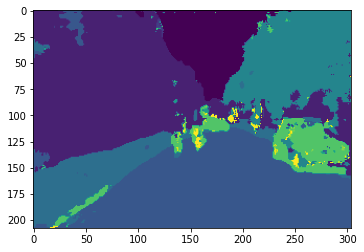

In [3]:
# Predict the segmentation of single test image using trained vgg segnet
out = model.predict_segmentation(
    inp="dataset/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

# Show the predicted output
plt.imshow(out)

# Evaluate the vgg segnet segmentation model 
print(model.evaluate_segmentation(inp_images_dir="dataset/images_prepped_test/", 
                                  annotations_dir="dataset/annotations_prepped_test/"))